Import Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_stata("callreports_final.dta", chunksize=100000, preserve_dtypes=True)

df_raw = pd.DataFrame()

for chunk in data:
    df_raw=df_raw.append(chunk)

Additional Settings

In [5]:
%matplotlib inline
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.style.use('ggplot')


plt.rcParams['font.size']=BIGGER_SIZE          # controls default text sizes
plt.rcParams['axes.titlesize']=BIGGER_SIZE     # fontsize of the axes title
plt.rcParams['axes.labelsize']=BIGGER_SIZE    # fontsize of the x and y labels
plt.rcParams['xtick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['ytick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['legend.fontsize']=BIGGER_SIZE    # legend fontsize
plt.rcParams['figure.titlesize']=BIGGER_SIZE  # fontsize of the figure title

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#removing Goldman Sachs and Morgan Stanley
df_raw = df_raw[(df_raw.rssdid!=1456501) & (df_raw.bhcid!=2380443)]

In [17]:
df = df_raw[["name", "bhcid", "rssdid","assets",'year', "quarter", "equity"]]


df_indBanks = df[df.bhcid == 0]


df = df[df.bhcid != 0]
df = df.groupby(["bhcid","year", "quarter"]).agg({"assets":"sum",
                                  "equity":"sum"})

df["leverageRatio"] = df.assets/df.equity

#rename bhcid to rssdid
df.index.names = ["rssdid", "year", "quarter"]

df_indBanks["leverageRatio"] = df_indBanks.assets/df_indBanks.equity
df_indBanks.set_index([df_indBanks.rssdid, df_indBanks.year, df_indBanks.quarter], inplace=True)
df_indBanks = df_indBanks[["assets", "equity", "leverageRatio"]]
#df_indBanks.drop(["rssdid", "bhcid", "year"], axis=1, inplace=True)
#df
df_all = pd.concat([df, df_indBanks])

In [28]:
df_all.leverageRatio.replace([np.inf, -np.inf], np.nan, inplace=True)
df_all.dropna(how="all", subset=["leverageRatio"],inplace=True)

df_all = df_all[df_all.leverageRatio>0] #removing all negativ leverageRatios

df_all_grouped = df_all.groupby(["year", "quarter"]).mean()

df_all_grouped

assets         equity  leverageRatio
year   quarter                                            
1976.0 1.0      8.614040e+04    5417.134318      12.662231
       2.0      8.854748e+04    5556.075080      12.553300
       3.0      8.975284e+04    5684.960622      12.375698
       4.0      9.493039e+04    5801.013851      12.817305
1977.0 1.0      9.519464e+04    5908.497639      12.570642
       2.0      9.844642e+04    6063.375310      12.608897
       3.0      1.015059e+05    6235.838712      12.353343
       4.0      1.074036e+05    6355.294569      12.957633
1978.0 1.0      1.076911e+05    6510.768928      12.576892
       2.0      1.119948e+05    6674.142307      12.647417
       3.0      1.146489e+05    6875.050517      12.410465
       4.0      1.210341e+05    7014.792647      12.904590
1979.0 1.0      1.209624e+05    7196.089399      12.364622
       2.0      1.261825e+05    7411.116143      12.300015
       3.0      1.311131e+05    7621.089862      12.061259
       4.0      1.355080e+05    7782.182262      12.378866
1980.0 1.0      1.362650e+05    8003.536908      11.943810
       2.0      1.401159e+05    8222.965957      11.823046
       3.0      1.431666e+05    8469.522879      11.792996
       4.0      1.496452e+05    8668.652577      12.090468
1981.0 1.0      1.513271e+05    8957.237784      11.792458
       2.0      1.561681e+05    9202.164884      11.665315
       3.0      1.596912e+05    9460.503493      11.495670
       4.0      1.657907e+05    9660.127973      12.130962
1982.0 1.0      1.666873e+05    9938.893675      11.883937
       2.0      1.705611e+05   10189.046065      11.740124
       3.0      1.749498e+05   10492.608264      11.600998
       4.0      1.828636e+05   10727.655658      12.132239
1983.0 1.0      1.835027e+05   11071.415675      11.844348
       2.0      1.881098e+05   11338.168389      12.069500
       3.0      1.905531e+05   11641.497930      12.017084
       4.0      1.996643e+05   11970.891347      12.374437
1984.0 1.0      2.021562e+05   12314.690558      12.224505
       2.0      2.083781e+05   12635.803148      12.151026
       3.0      2.097487e+05   13112.079663      11.891136
       4.0      2.192182e+05   13454.314053      12.536645
1985.0 1.0      2.199895e+05   13841.553162      12.416459
       2.0      2.269884e+05   14237.007340      12.440071
       3.0      2.339718e+05   14783.976815      12.219758
       4.0      2.458839e+05   15221.879480      13.007592
1986.0 1.0      2.478364e+05   15705.814138      12.744754
       2.0      2.542558e+05   16078.929647      12.745570
       3.0      2.591923e+05   16585.652416      13.171547
       4.0      2.783959e+05   17253.830450      13.533672
1987.0 1.0      2.770491e+05   17846.100393      13.971935
       2.0      2.805545e+05   16930.234964      15.165372
       3.0      2.867058e+05   17615.660770      14.549232
       4.0      2.943486e+05   17827.942566      15.002275
1988.0 1.0      2.988489e+05   18235.984241      13.496047
       2.0      3.039271e+05   18952.239819      13.480981
       3.0      3.131038e+05   19625.318991      15.463742
       4.0      3.179979e+05   20189.457143      16.243256
1989.0 1.0      3.234794e+05   20908.459504      13.932675
       2.0      3.300923e+05   21450.391688      13.773141
       3.0      3.339483e+05   21357.850105      13.814268
       4.0      3.455482e+05   21661.359839      15.251664
1990.0 1.0      3.516736e+05   22492.105835      13.525284
       2.0      3.582281e+05   23028.469582      13.004936
       3.0      3.622328e+05   23345.718767      13.311325
       4.0      3.646859e+05   23535.524154      14.767462
1991.0 1.0      3.632614e+05   24217.342667      13.194809
       2.0      3.676329e+05   24682.517762      13.309173
       3.0      3.759130e+05   25191.478414      15.324722
       4.0      3.778192e+05   25498.434288      14.905051
1992.0 1.0      3.822482e+05   26582.059158      12.492527
       2.0      3.855269e+05   27809.878318      12.034621
       3.0

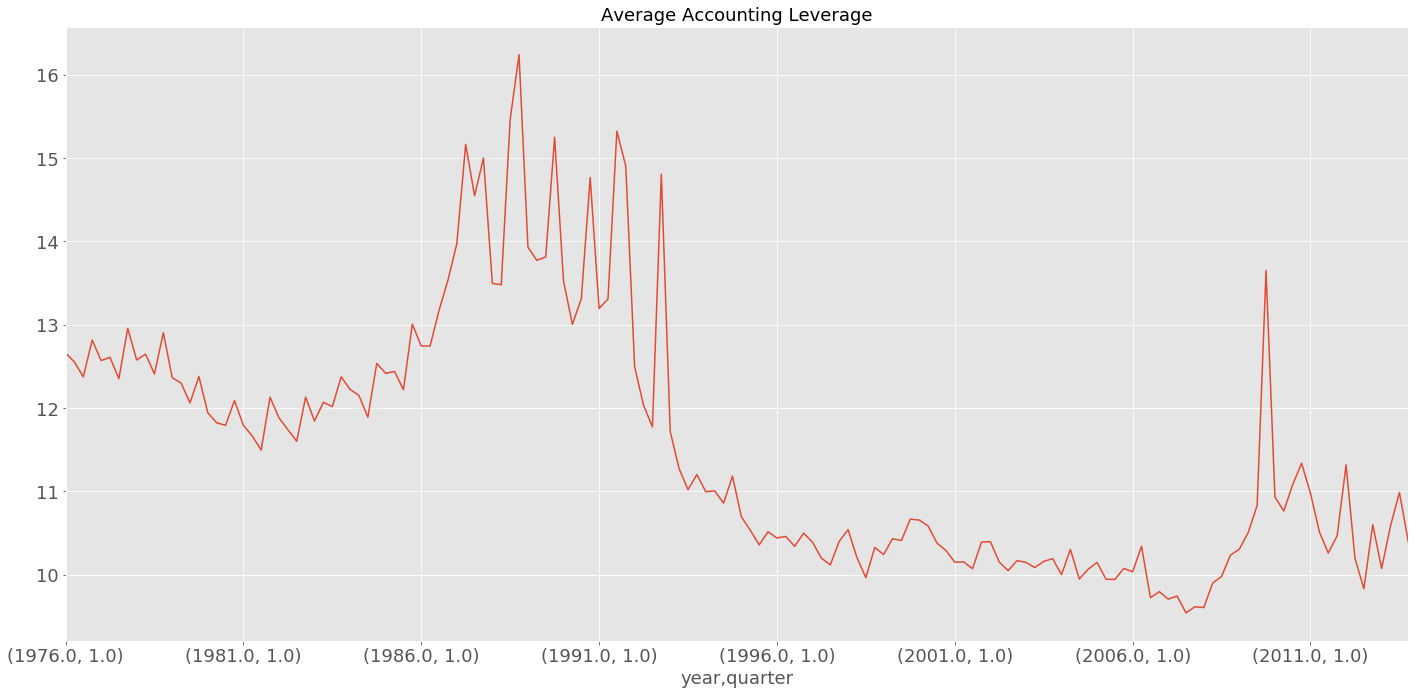

In [30]:



fig, ax = plt.subplots(figsize=(20,10));
#ax.set_xticks(df_years_mean.index)
#ax.set_xticklabels(df_years_mean.index, rotation=60)
ax.set_xlabel("Year")
ax.set_title("Average Accounting Leverage")
ax.grid()
df_all_grouped.leverageRatio.plot(ax=ax)
#ax.plot(df_all_grouped.leverageRatio,"g-")
#ax.plot(df_all_grouped.leverageRatio,"oy")
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/LeverageDistribution_LeverageRatio_7613.png')